In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Aim is to predict the marks of students of the test data

In [2]:
# Use the file namd 'training data' to train the model

data = pd.read_excel('Training data.xlsx')
x_train = np.array(data.iloc[:,0:8])
y_train = np.array(data.iloc[:,8]).reshape(-1,1)

# Try plotting y_train with different features
# To get an idea whether to add some features or not
# Add some features if required in x_train

# Also do label encoding for features not represented in numbers
# refer the link if not know : https://youtu.be/589nCGeWG1w?si=t2Wa7LgbUOO4RooM

def feature_changing(x_train):
  gender = lambda g:0.1 if g=='M' else -0.1
  internet = lambda i:0.1 if i=='yes' else -0.1
  x_train[:,0] = np.vectorize(internet)(x_train[:,0])
  x_train[:,1] = np.vectorize(gender)(x_train[:,1])
  x = x_train[:,[0,2,3,4,5,6,7]]
  # ---------
    # Your code here
  # ---------
  return x

x_train = feature_changing(x_train)

In [3]:
print(x_train[0],y_train[0])

[-0.1 2 2 5 6 18 118] [73.13]


In [4]:
def z_score(x_train):
    
  # ---------
    # write the code for feature scaling here
    x_mean = np.mean(x_train,axis = 0)
    x_std = np.std(x_train,axis=0)
    x_train = ( x_train - x_mean ) / x_std
  # ---------
    print(x_mean,x_std)
    return x_train,x_std,x_mean


In [5]:
def cost(x_train,y_train,w,b):
    
  # ---------
    # Your code here
    # Use mean square error as cost function
    # return cost
    return np.mean((y_train-(np.dot(x_train,w)+b))**2)
  # ---------

    

In [6]:
def gradient_descent(x_train,y_train,w,b,learning_rate = 0.01):

  # ---------
    # Your code here
    y_output = np.dot(x_train,w) + b

    # print(np.matmul(x_train.T,y_output-y_train).shape)
    dw = np.matmul(x_train.T,y_output-y_train)/len(y_train)
   
    db = np.mean(y_output-y_train)
    w -= learning_rate*dw
    b -= learning_rate*db
    assert w.shape == (7,1)
    return w,b
  # ---------


[3.64000e-02 1.74200e+00 2.10200e+00 3.19100e+00 4.99900e+00 1.79790e+01
 1.09026e+02] [ 0.09313989  0.89968661  0.92281959  1.26827402  2.66289298  0.63289731
 11.63337114]


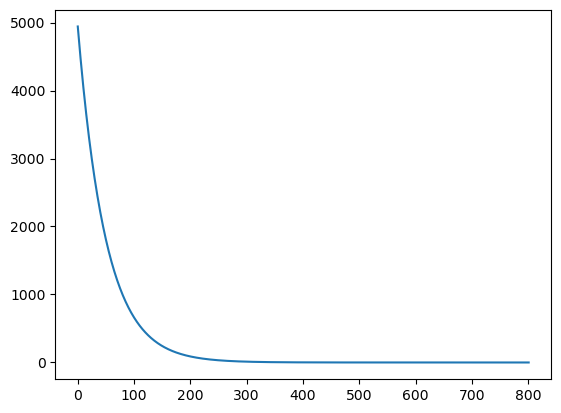

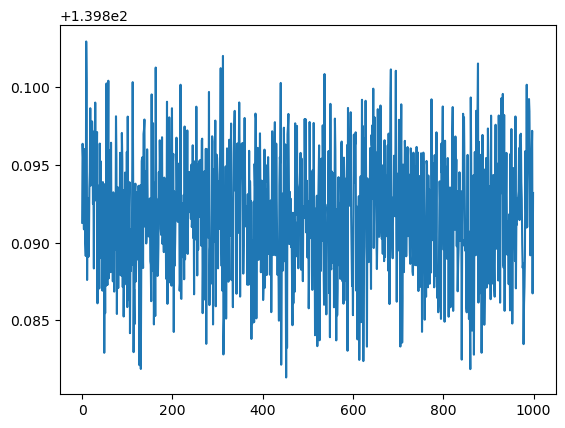

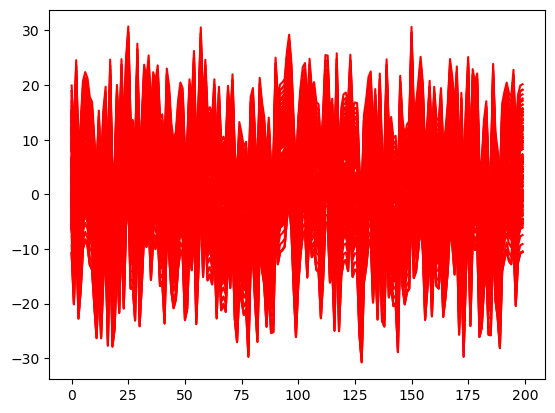

Congratulations, your accuracy is 100.0%


In [7]:
x_train = x_train.astype(np.float64)
x_train,x_std,x_mean = z_score(x_train)

np.random.seed(2147483647)
w = np.random.randn(x_train.shape[1],1)
b = np.random.randn(1)

old_cost = 0
costs = []
while abs(old_cost - cost(x_train,y_train,w,b)) > 0.00001:
  old_cost = cost(x_train,y_train,w,b)
  costs.append(old_cost)
  w,b = gradient_descent(x_train,y_train,w,b)

plt.plot(np.arange(len(costs)),np.array(costs))
plt.show()


x_predict = pd.read_excel('Test data.xlsx').iloc[:,:8].to_numpy()
x_predict = feature_changing(x_predict)
x_predict = (x_predict - x_mean)/x_std


ans = pd.read_excel('Test data.xlsx').iloc[:,8].to_numpy()

y_predict = np.dot(x_predict,w) + b

plt.plot(np.arange(1000),y_train-np.dot(x_train,w)+b)
plt.show()

plt.plot(np.arange(200),y_predict-ans,c='Red')
plt.show()

accuracy = 0
for dim in range(len(ans)):
  if abs(y_predict[dim]-ans[dim])<0.5: # do not change the tolerance as you'll be checked on +- 0.5 error only
    accuracy += 1

accuracy = round(accuracy*100/200.0,2)
ok = 'Congratulations' if accuracy>95 else 'Optimization required'
print(f"{ok}, your accuracy is {accuracy}%")